In [5]:
import tensorflow;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense;
from tensorflow.keras.datasets import mnist;
from tensorflow.keras.utils import to_categorical;
import numpy;

import matplotlib.pyplot as plt;

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data();

# Split the test and val by 50:50
test_val_images_split = numpy.array_split(test_images, 2);
test_val_labels_split = numpy.array_split(test_labels, 2);

test_images = test_val_images_split[0];
test_labels = test_val_labels_split[0];

val_images = test_val_images_split[1];
val_labels = test_val_labels_split[1];

train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Data Pre-Processing

1. Reshape the image data to float32 array. Well. 
2. Perform One-Hot Encoding to all labels

In [7]:
# Recall step 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255;
test_images = test_images.reshape((5000, 28, 28, 1)).astype('float32') / 255;
val_images = val_images.reshape((5000, 28, 28, 1)).astype('float32') / 255;

# Recall step 2
train_labels = tensorflow.one_hot(train_labels, depth = 10);
test_labels = tensorflow.one_hot(test_labels, depth = 10);
val_labels = tensorflow.one_hot(val_labels, depth = 10);

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8832 - loss: 0.3922 - val_accuracy: 0.9914 - val_loss: 0.0301
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9836 - loss: 0.0550 - val_accuracy: 0.9924 - val_loss: 0.0238
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9946 - val_loss: 0.0161
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9928 - val_loss: 0.0213
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9944 - val_loss: 0.0147


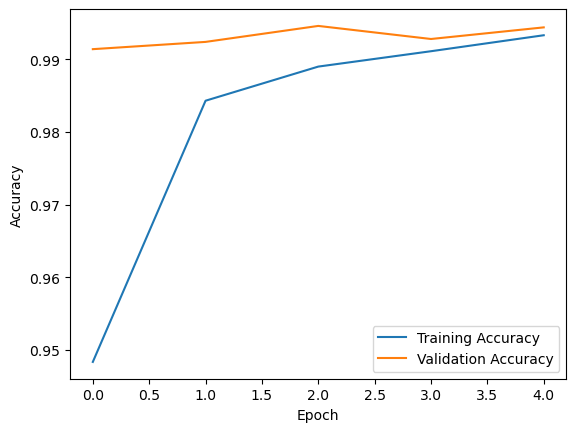

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0438
Test accuracy: 0.9843999743461609


In [8]:
class CNNModel:
    def __init__(self):
        model = Sequential();

        # Input layer
        model.add(Input(shape = (28, 28, 1)));

        # Hidden layers
        for i in [self.hidden_layers()]:
            for j in i:
                model.add(j);
    
        # Output layer
        # Put 10 since MNIST consist of 10 different classes
        model.add(Dense(10, activation = "softmax"));
    
        self.model = model;

    def hidden_layers(self):
        return [
            # convolutional_1
            Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"),
            MaxPooling2D((2, 2)),

            # convolutional_2
            Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
            MaxPooling2D((2, 2)),
            
            # Fully connected layers
            Flatten(),
            Dense(64, activation = "relu"),
        ];

    def fitting(self):
        model = self.model;

        model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"]);
        model.summary();

        history = model.fit(
            train_images, 
            train_labels, 
            epochs = 5, 
            batch_size = 64, 
            validation_data = (val_images, val_labels)
        );

        # Plot training history
        plt.plot(history.history['accuracy'], label='Training Accuracy');
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy');
        plt.xlabel('Epoch');
        plt.ylabel('Accuracy');
        plt.legend();
        plt.show();

        return model;

cnn = CNNModel();
model = cnn.fitting();

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')